In [ ]:
import librosa                            # Параметризация аудио
import librosa.display                    # Визуализация аудио
import matplotlib.pyplot as plt           # Отрисовка графиков
import IPython.display as ipd             # Проигрывание аудио в colab
import gdown                              # Загрузка датасетов из облака

import numpy as np

# Нормирование сигнала
from sklearn.preprocessing import minmax_scale, scale

%matplotlib inline

In [ ]:
# Подключаем гугл диск

# data_path = '/content/drive/MyDrive/ai/sounds/Голос_близко/'

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/ai/sounds'  # имя папки проекта (ресурсов проекта)
audio_path = f'{data_path}/extended_dataset'    # имя папки с аудиозаписями
image_path = f'{data_path}/mel_images'          # имя папки с изображениями графического представления мел кепстральных коэффициентов

In [ ]:
command_list = ['Остановись', 'Передвигайся вперед', 'Закрывай захват']

In [ ]:
# Полный список команд

command_list_extended = [
    'взаимодействуй с объектами',
    'осмотри окружение',
    'включай автоматический режим движения',
    'включай автоматический режим',
    'включи авторежим',
    'включи свет',
    'возвращайся в начальную точку',
    'домой',
    'выключай автоматический режим движения',
    'выключи режим автохода',
    'выключай автоматический режим',
    'стоп авторежим',
    'выключи свет',
    'двигайся вперёд',
    'закрывай захват',
    'снимай видео',
    'измени направление движения',
    'измени скорость',
    'изменяй шаговую длину',
    'опускайся на указанную высоту',
    'спускайся',
    'опускай руку вниз',
    'останавливай запись видео',
    'стоп видео',
    'остановись',
    'стоп',
    'открывай захват',
    'открой захват',
    'возьми',
    'передвигайся вперёд',
    'вперед',
    'передвигайся назад',
    'иди назад',
    'назад',
    'перестраивайся в другую конфигурацию',
    'поворачивай влево',
    'поворачивай вправо',
    'сделай громче',
    'поднимай руку вверх',
    'поднимайся по лестнице',
    'сделай звук тише',
    'на пути препятствие',
    'руки - какие руки',
    'спускайся по лестнице',
    'бегом',
    'иди тише',
    'это как'
]

## Разделение всех файлов, которые содержат в себе вариации команды

In [ ]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

first_part_name = '/content/drive/MyDrive/ai/sounds/splited_0/'

In [ ]:
def split_audio(file_name):

    audio = AudioSegment.from_file(file_name)

    phrases = split_on_silence(audio, min_silence_len=500, silence_thresh=-50)

    command_name = file_name[46:-4]

    for i, phrase in enumerate(phrases):
        phrase.export(f"{first_part_name}{command_name}_{i}.wav", format="wav")

In [ ]:
for f_name in file_names:

    split_audio(f_name)

## Расширение датасета

Источник модели для генерации https://habr.com/ru/articles/660565/

In [ ]:
!pip install -q torchaudio omegaconf

import torch
from pprint import pprint
from omegaconf import OmegaConf
from IPython.display import Audio, display

import os
import wave
import contextlib

torch.hub.download_url_to_file('https://raw.githubusercontent.com/snakers4/silero-models/master/models.yml',
                               'latest_silero_models.yml',
                               progress=False)
models = OmegaConf.load('latest_silero_models.yml')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# see latest avaiable models
available_languages = list(models.tts_models.keys())
print(f'Available languages {available_languages}')

for lang in available_languages:
    _models = list(models.tts_models.get(lang).keys())
    print(f'Available models for {lang}: {_models}')

Available languages ['ru', 'en', 'de', 'es', 'fr', 'ba', 'xal', 'tt', 'uz', 'ua', 'indic', 'cyrillic', 'multi']
Available models for ru: ['v4_ru', 'v3_1_ru', 'ru_v3', 'aidar_v2', 'aidar_8khz', 'aidar_16khz', 'baya_v2', 'baya_8khz', 'baya_16khz', 'irina_v2', 'irina_8khz', 'irina_16khz', 'kseniya_v2', 'kseniya_8khz', 'kseniya_16khz', 'natasha_v2', 'natasha_8khz', 'natasha_16khz', 'ruslan_v2', 'ruslan_8khz', 'ruslan_16khz']
Available models for en: ['v3_en', 'v3_en_indic', 'lj_v2', 'lj_8khz', 'lj_16khz']
Available models for de: ['v3_de', 'thorsten_v2', 'thorsten_8khz', 'thorsten_16khz']
Available models for es: ['v3_es', 'tux_v2', 'tux_8khz', 'tux_16khz']
Available models for fr: ['v3_fr', 'gilles_v2', 'gilles_8khz', 'gilles_16khz']
Available models for ba: ['aigul_v2']
Available models for xal: ['v3_xal', 'erdni_v2']
Available models for tt: ['v3_tt', 'dilyara_v2']
Available models for uz: ['v4_uz', 'v3_uz', 'dilnavoz_v2']
Available models for ua: ['v4_ua', 'v3_ua', 'mykyta_v2']
Availab

In [ ]:
import torch

language = 'ru'
model_id = 'v4_ru'
device = torch.device('cpu')

model, example_text = torch.hub.load(repo_or_dir='snakers4/silero-models',
                                     model='silero_tts',
                                     language=language,
                                     speaker=model_id)
model.to(device)  # gpu or cpu

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/snakers4/silero-models/zipball/master" to /root/.cache/torch/hub/master.zip
100%|██████████| 38.2M/38.2M [00:03<00:00, 10.2MB/s]


In [ ]:
speakers = model.speakers
speakers

['aidar', 'baya', 'kseniya', 'xenia', 'eugene', 'random']

In [ ]:
def write_wave(path, audio, sample_rate):
    """Writes a .wav file.
    Takes path, PCM audio data, and sample rate.
    """
    with contextlib.closing(wave.open(path, 'wb')) as wf:
        wf.setnchannels(1)
        wf.setsampwidth(2)
        wf.setframerate(sample_rate)
        wf.writeframes(audio)

In [ ]:
data_path = '/content/drive/MyDrive/ai/sounds/extended_dataset/'

speakers = model.speakers

sample_rate = 48000
put_accent=True
put_yo=True

command_list = command_list_extended

In [ ]:
for command in command_list:

  new_dir = f"{data_path}{command}"
  os.mkdir(new_dir)

  for speaker in speakers:

    audio = model.apply_tts(text=command,
                            speaker=speaker,
                            sample_rate=sample_rate,
                            put_accent=put_accent,
                            put_yo=put_yo)

    write_wave(path=f"{new_dir}/{speaker}.wav",
               audio=(audio * 32767).numpy().astype('int16'),
               sample_rate=sample_rate)

Generated new voice
Generated new voice
Generated new voice


In [ ]:
from IPython.display import Audio, display
display(Audio(f'{data_path}/Остановись/eugene.wav', rate=sample_rate))

In [ ]:
N = 20
speaker = 'random'

for i, command in enumerate(command_list):

  for i in range(N):

    audio = model.apply_tts(text=command,
                            speaker=speaker,
                            sample_rate=sample_rate)

    write_wave(path=f"{data_path}{command}/random_00{i}.wav",
               audio=(audio * 32767).numpy().astype('int16'),
               sample_rate=sample_rate)

In [ ]:
from IPython.display import Audio, display
display(Audio(f'{data_path}/Остановись/random_001.wav', rate=sample_rate))

In [ ]:
# Проверим длительность файлов

!pip install pydub

from pydub import AudioSegment

voice_command = AudioSegment.from_file(f'{FILE_DIR}/Остановись/random_001.wav')

voice_command

In [ ]:

voice_command = AudioSegment.from_file(f'{FILE_DIR}/Остановись/eugene.wav')

voice_command

## Подача в нейросеть

In [ ]:
# Преобразование категориальных данных в one hot encoding
from tensorflow.keras.utils import to_categorical

# Сохранение и загрузка структур данных Python
import pickle

# Оптимизаторы для обучения моделей
from tensorflow.keras.optimizers import Adam, RMSprop

# Разбиение на обучающую и проверочную выборку
from sklearn.model_selection import train_test_split

# Кодирование категориальных меток, нормирование числовых данных
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Отключение предупреждений
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Сохранение изображения мел коэффициентов в файл

In [ ]:
import librosa

def load_audio(audio_path,       # путь к файлу с аудио
               show_text=True,   # показывать ли текстовую сводку по аудио
               show_player=True  # выводить ли проигрыватель в ячейку
               ):

    x, sr = librosa.load(audio_path)

    if show_text:
        # Вывод текстовых данных о сигнале
        print(f'Типы данных x и sr: {type(x)}, {type(sr)}')
        print(f'Форма данных x: {x.shape}, sr = {sr}')
        print('Продолжительность сигнала:', round(x.shape[0]/sr), 'с.\n')

    if show_player:
        # Вывод проигрывателя в ячейку colab
        ipd.display(ipd.Audio(audio_path))

    # Возврат загруженных данных для дальнейшего использования
    return x, sr

In [ ]:
# Пример аугментации

# Квадрат значений
x_train_data_sqr = x_train_data ** 2

# Квадратный корень из модулей значений
x_train_data_sqrt = np.abs(x_train_data) ** 0.5

# Обратная величина
x_train_data_inv = 1. / x_train_data

# 2 в степени каждого значения
x_train_data_exp = 2. ** x_train_data

# Формирование нового тренировочного набора данных
x_train_data_aug = np.hstack([x_train_data, x_train_data_sqr, x_train_data_sqrt, x_train_data_exp])

## Аугментация

In [ ]:
# Функция для аугментации и сохранения нормированных мел в виде изображения
def save_normal_mfcc_aug_img(audio_fname, image_fname):
    # Загрузка аудио
    x, sr = load_audio(audio_fname)
    # Вычисление и отображение мел-частотных кепстральных коэффициентов
    mfcc = librosa.feature.mfcc(y=x, sr=sr)
    # Нормирование мел-коэффициентов
    normalized_mfcc = scale(mfcc, axis=1)
    # Сохранение визуализации нормированных коэффициентов в файл
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(normalized_mfcc, sr=sr, x_axis='time')
    plt.savefig(f'{image_fname}_0.png')

    # То же самое для квадратов значений
    normalized_mfcc = scale(mfcc ** 2, axis=1)
    # Сохранение визуализации нормированных коэффициентов в файл
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(normalized_mfcc, sr=sr, x_axis='time')
    plt.savefig(f'{image_fname}_1.png')

    # То же самое для корней из модулей значений
    normalized_mfcc = scale(np.abs(mfcc) ** 0.5, axis=1)
    # Сохранение визуализации нормированных коэффициентов в файл
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(normalized_mfcc, sr=sr, x_axis='time')
    plt.savefig(f'{image_fname}_2.png')

    # То же самое для обратных велечин
    # normalized_mfcc = scale(1. / mfcc, axis=1)
    # Сохранение визуализации нормированных коэффициентов в файл
    # plt.figure(figsize=(14, 5))
    # librosa.display.specshow(normalized_mfcc, sr=sr, x_axis='time')
    # plt.savefig(f'{image_fname}_3.png')


In [ ]:
# Функция для сохранения нормированных мел в виде изображения

def save_normal_mfcc_img(audio_fname, image_fname):
    # Загрузка аудио
    x, sr = load_audio(audio_fname)
    # Вычисление и отображение мел-частотных кепстральных коэффициентов
    mfcc = librosa.feature.mfcc(y=x, sr=sr)
    # Нормирование мел-коэффициентов
    normalized_mfcc = scale(mfcc, axis=1)
    # Сохранение визуализации нормированных коэффициентов в файл
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(normalized_mfcc, sr=sr, x_axis='time')
    plt.savefig(image_fname)

In [ ]:
# Создание набора данных на основе изображений мел коэффициентов

import os

audio_path = f'{data_path}/extended_dataset'
image_path = f'{data_path}/mel_aug_images'

for dir in os.listdir(audio_path):

    img_dir = f'{image_path}/{dir}'
    os.mkdir(img_dir)

    for f_name in os.listdir(f'{audio_path}/{dir}'):

        save_normal_mfcc_aug_img(f'{audio_path}/{dir}/{f_name}', f'{img_dir}/{f_name[:-4]}')
        print(f'{audio_path}/{dir}/{f_name}')

#### Подготовка данных

In [ ]:
data_path = '/content/drive/MyDrive/ai/sounds'  # имя папки проекта (ресурсов проекта)
audio_path = f'{data_path}/extended_dataset'    # имя папки с аудиозаписями
image_path = f'{data_path}/mel_aug_images'      # имя папки с изображениями графического представления мел кепстральных коэффициентов

In [ ]:
import os
import numpy as np

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

def prepare_data(directory_path, target_size=(50, 140)):
    """
    Подготавливает данные для обучения модели.

    Параметры:
        directory_path (str): Путь к директории с изображениями.
        target_size (tuple): Размер изображений, на которые они будут приведены перед обучением.

    Возвращает:
        Массивы numpy для обучающих и валидационных данных и меток классов.
    """
    # Создаем списки для данных и меток
    x_data, y_data = [], []
    x_train, y_train, x_val, y_val = [], [], [], []

    # Проходимся по всем поддиректориям и файлам в директории
    for i, dir in enumerate(os.listdir(image_path)):
        command_dir = f'{image_path}/{dir}'

        for audio_name in os.listdir(command_dir):
            file_name = f'{command_dir}/{audio_name}'
            img = load_img(file_name, target_size=target_size)
            x_data.append(img_to_array(img))
            y_data.append(i)

    y_data = to_categorical(y_data, num_classes=3)

    x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify=y_data, shuffle=True)

    # Преобразуем списки в массивы numpy
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_val = np.array(x_val)
    y_val = np.array(y_val)

    return x_train, y_train, x_val, y_val

In [ ]:
CLASSES = os.listdir(image_path)

In [ ]:
# Подготавливаем данные
x_train, y_train, x_val, y_val = prepare_data(image_path)
# Выводим размеры массивов
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_val shape: {x_val.shape}, y_val shape: {y_val.shape}')

x_train shape: (187, 50, 140, 3), y_train shape: (187, 3)
x_val shape: (47, 50, 140, 3), y_val shape: (47, 3)


#### Обучение и сохранение результатов

In [ ]:
!pip -q install autokeras

In [ ]:
import autokeras as ak

input_node = ak.ImageInput()
output_node = ak.ImageBlock(
    block_type="vanilla",
    normalize=True,
    augment=False,
)(input_node)
output_node = ak.ClassificationHead()(output_node)

clf = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    overwrite=True,
    max_trials=10,
    objective='val_accuracy'
)

In [ ]:
from tensorflow import keras

In [ ]:
model_check_point = keras.callbacks.ModelCheckpoint("best_model", monitor="val_accuracy", verbose=0, save_best_only=True, save_weights_only=False, mode="auto", save_freq="epoch")

In [ ]:
clf.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15, batch_size=64, callbacks=[model_check_point])


Trial 10 Complete [00h 00m 39s]
val_accuracy: 0.978723406791687

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 19m 44s
Epoch 1/15
3/3 [==============================] - 8s 3s/step - loss: 1.3025 - accuracy: 0.3850 - val_loss: 1.0918 - val_accuracy: 0.3404
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 1.0610 - accuracy: 0.4064 - val_loss: 1.1031 - val_accuracy: 0.3404
Epoch 3/15
3/3 [==============================] - 3s 1s/step - loss: 1.0855 - accuracy: 0.3316 - val_loss: 1.0811 - val_accuracy: 0.3404
Epoch 4/15
3/3 [==============================] - 6s 2s/step - loss: 1.0626 - accuracy: 0.3369 - val_loss: 1.0582 - val_accuracy: 0.3404
Epoch 5/15
3/3 [==============================] - 4s 2s/step - loss: 1.0340 - accuracy: 0.4759 - val_loss: 1.0301 - val_accuracy: 0.4894
Epoch 6/15
3/3 [==============================] - 6s 2s/step - loss: 0.9877 - accuracy: 0.7326 - val_loss: 0.9834 - val_accuracy: 0.7447
Epoch 7/15
3/3 [==============================] - 5

In [ ]:
# model_ [номер эксперимента]_[способ ak - autokeras_[vanilla - преднастройка]]_ [val_accuracyXX]_[DDMM - дата]
best_model = load_model('best_model')
best_model.summary()

In [ ]:
best_model.save('/content/drive/MyDrive/ai/sounds/models/model_7_ak_va10_1211.keras')

In [ ]:
from tensorflow.keras.optimizers import Adam

model_x.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Запись через микрофон

In [ ]:
!pip -q install ffmpeg-python SpeechRecognition pydub jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 81.8 MB/s eta 0:00:00


In [ ]:
import gdown
gdown.download('https://storage.yandexcloud.net/aiueducation/Intensive/v2.0/micro.py', None, quiet=True)

import micro
import scipy

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

import librosa                            # Параметризация аудио
import librosa.display                    # Визуализация аудио
import matplotlib.pyplot as plt           # Отрисовка графиков
import IPython.display as ipd             # Проигрывание аудио в colab
import gdown                              # Загрузка датасетов из облака

# Нормирование сигнала
from sklearn.preprocessing import minmax_scale, scale

%matplotlib inline

In [ ]:
def record(file_name):
    # Запустим процесс записи с микрофона
    audio, sr = micro.get_audio()

    # Сохраним запись в файл recording.wav
    scipy.io.wavfile.write(file_name, sr, audio)

In [ ]:
def load_audio(audio_path,       # путь к файлу с аудио
               show_text=True,   # показывать ли текстовую сводку по аудио
               show_player=True  # выводить ли проигрыватель в ячейку
               ):

    x, sr = librosa.load(audio_path)

    if show_text:
        # Вывод текстовых данных о сигнале
        print(f'Типы данных x и sr: {type(x)}, {type(sr)}')
        print(f'Форма данных x: {x.shape}, sr = {sr}')
        print('Продолжительность сигнала:', round(x.shape[0]/sr), 'с.\n')

    if show_player:
        # Вывод проигрывателя в ячейку colab
        ipd.display(ipd.Audio(audio_path))

    # Возврат загруженных данных для дальнейшего использования
    return x, sr

# Функция для сохранения нормированных мел в виде изображения

def save_normal_mfcc_img(audio_fname, image_fname):
    # Загрузка аудио
    x, sr = load_audio(audio_fname)
    # Вычисление и отображение мел-частотных кепстральных коэффициентов
    mfcc = librosa.feature.mfcc(y=x, sr=sr)
    # Нормирование мел-коэффициентов
    normalized_mfcc = scale(mfcc, axis=1)
    # Сохранение визуализации нормированных коэффициентов в файл
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(normalized_mfcc, sr=sr, x_axis='time')
    plt.savefig(image_fname)

In [ ]:
print(CLASSES)

['Остановись', 'Передвигайся вперед', 'Закрывай захват']


In [ ]:
test_audio_name = 'zakrivay_test_1.wav'

record(test_audio_name)

In [ ]:
# test_audio_name = '/content/drive/MyDrive/ai/sounds/splited_0/Остановись_0.wav'

# test_audio_name = '/content/drive/MyDrive/ai/sounds/splited_0/Передвигайся вперед_0.wav'

test_audio_name = '/content/drive/MyDrive/ai/sounds/splited_0/закрывай захват_0.wav'


Типы данных x и sr: <class 'numpy.ndarray'>, <class 'int'>
Форма данных x: (42557,), sr = 22050
Продолжительность сигнала: 2 с.



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


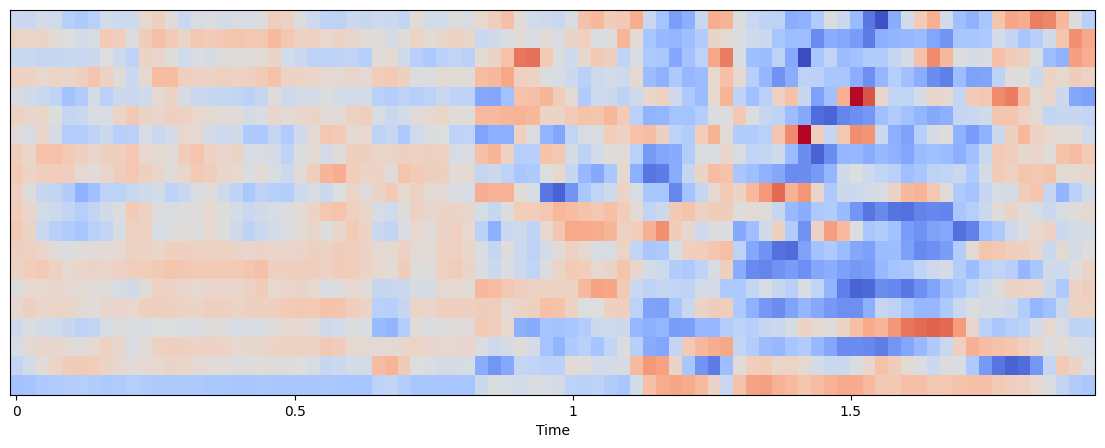

In [ ]:
save_normal_mfcc_img(test_audio_name, 'myvoice.png')

In [ ]:
img = load_img('myvoice.png', target_size=(50, 140))

test_data = img_to_array(img)
print(test_data.shape)

test_data = np.expand_dims(test_data, axis=0)
print(test_data.shape)

(50, 140, 3)
(1, 50, 140, 3)


#Встреча VI

In [ ]:
# Подключаем гугл диск

# data_path = '/content/drive/MyDrive/ai/sounds/Голос_близко/'

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_path = '/content/drive/MyDrive/ai/sounds'  # имя папки проекта (ресурсов проекта)
audio_path = f'{data_path}/extended_dataset'    # имя папки с аудиозаписями
image_path = f'{data_path}/mel_images'          # имя папки с изображениями графического представления мел кепстральных коэффициентов

In [ ]:
!pip -q install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 19.9 MB/s eta 0:00:00


In [ ]:
import autokeras as ak
from tensorflow.keras.models import load_model

Using TensorFlow backend


In [ ]:
model_one = load_model('/content/drive/MyDrive/ai/sounds/models/model_4.keras')

In [ ]:
# Один из результатов обучения полученный до аугментации
model_one.predict(test_data)

# Предикт с ошибкой

1/1 [==============================] - 0s 234ms/step


array([[0.19669525, 0.07764003, 0.72566473]], dtype=float32)

In [ ]:
model_2 = load_model('/content/drive/MyDrive/ai/sounds/models/model_5.keras')

In [ ]:
# Один из результатов обучения полученный до аугментации
model_2.predict(test_data)

# Предикт с ошибкой

1/1 [==============================] - 0s 67ms/step


array([[0.2710357 , 0.46848166, 0.2604826 ]], dtype=float32)

In [ ]:
# Для предсказания используется модель обученная на наборе расширенном при помощи аугментации
best_model.predict(test_data)  # Остановись - аудио записано через микрофон ноутбука

1/1 [==============================] - 0s 99ms/step


array([[0.86140424, 0.09550528, 0.0430904 ]], dtype=float32)

In [ ]:
# Для предсказания используется модель обученная на наборе расширенном при помощи аугментации
best_model.predict(test_data)  # Передвигайся вперед - аудио записано через микрофон ноутбука

1/1 [==============================] - 0s 44ms/step


array([[0.0020161 , 0.81234324, 0.18564068]], dtype=float32)

In [ ]:
# Для предсказания используется модель обученная на наборе расширенном при помощи аугментации
best_model.predict(test_data)  # Закрывай захват - аудио записано через микрофон ноутбука

1/1 [==============================] - 0s 39ms/step


array([[4.2748419e-04, 1.9431557e-01, 8.0525696e-01]], dtype=float32)

In [ ]:
CLASSES

['Остановись', 'Передвигайся вперед', 'Закрывай захват']

Тесты предсказаний модели, обученной на наборе данных, который был расширен аугментацией, показали хорошие результаты (по одной записи для каждого класса из трех, распознаны безошибочно)

In [ ]:
best_model = load_model('/content/drive/MyDrive/ai/sounds/models/model_7_ak_va10_1211.keras')

In [ ]:
best_model.predict(test_data)

1/1 [==============================] - 0s 304ms/step


array([[0.0654661 , 0.71602976, 0.21850412]], dtype=float32)